In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [128]:
shape = (2167, 2070)
shape = (100,100)
img = np.zeros( shape )

In [129]:
%matplotlib notebook

<IPython.core.display.Javascript object>


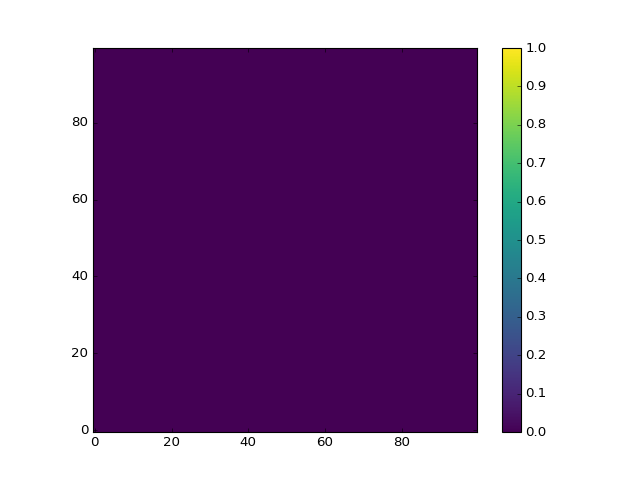

In [130]:
fig, ax = plt.subplots()
im = ax.imshow(img, vmin=0,vmax=1,cmap='viridis', origin = 'lower')
plt.colorbar( im  )

In [131]:
def sphere_form_factor(q, R=2500.):
    qR = q*R
    pq = (4/3.*np.pi)*R**3*( 3*np.sin( qR ) - qR*np.cos(qR)  )/qR**3
    return pq


In [172]:
def sphere_form_factor_2D(img,  R=2500.,center=None, qmax = None,noise=None):
    dimx,dimy = img.shape
    if center is None:center = [dimx/2,dimy/2] 
    #print (center)
    cenx,ceny = center 
    y, x = np.indices( [dimy,dimx] )                                
    y_= y- ceny +1;x_=x-cenx+1 
    q= np.int_( np.hypot(x_, y_)    + 0.5  )  
    print( q.max() )
    q = q/ q.max() * qmax
    
    #print (   q                    )
    qR = q*R
    pq = (4/3.*np.pi)*R**3*( 3*np.sin( qR ) - qR*np.cos(qR)  )/qR**3
    pq[np.where(q==0)] =0
    return pq


In [173]:
R=2500.  #250 nm
q = np.linspace( 0.001, 0.02,300)
pq2d = sphere_form_factor_2D( img,R, qmax=0.02)

71


-c:14: RuntimeWarning: invalid value encountered in true_divide


In [174]:
np.max( pq2d )

263417807911.34009

In [175]:
dimx,dimy = pq2d.shape
center = [dimx/2,dimy/2] 


<IPython.core.display.Javascript object>


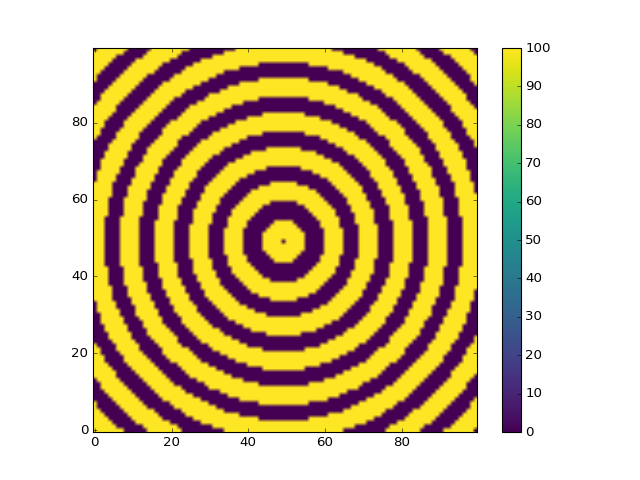

In [176]:
fig, ax = plt.subplots()
im = ax.imshow(pq2d, vmin=0,vmax=1E2,cmap='viridis', 
               origin = 'lower')
plt.colorbar( im  )

In [220]:
#R=2500.  #250 nm
qt = np.linspace( 0.001, 0.02,300)
pqt = sphere_form_factor( q,R)

<IPython.core.display.Javascript object>


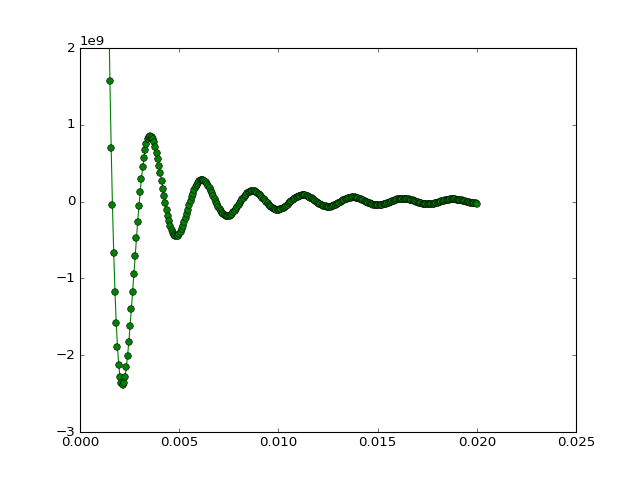

(-3000000000.0, 2000000000.0)

In [221]:

fig, ax = plt.subplots()
ax.plot( qt, pqt,'go', ls='-')
ax.set_ylim( -.3E10, .2E10)


In [180]:
#a test using ROI.

In [181]:
import skxray.core.roi as roi

In [243]:
import skxray.core.utils as utils

In [244]:
def circular_average(image, calibrated_center, threshold=0, nstart=None,nend=None,nwidth=1,
                     pixel_size=None):
    """Circular average of the the image data
    The circular average is also known as the radial integration
    Parameters
    ----------
    image : array
        Image to compute the average as a function of radius
    calibrated_center : tuple
        The center of the image in pixel units
        argument order should be (row, col)
    threshold : int, optional
        Ignore counts above `threshold`
    nx : int, optional
        Number of bins in R. Defaults to 100
    pixel_size : tuple, optional
        The size of a pixel (in a real unit, like mm).
        argument order should be (pixel_height, pixel_width)
    Returns
    -------
    bin_centers : array
        The center of each bin in R. shape is (nx, )
    ring_averages : array
        Radial average of the image. shape is (nx, ).
    """
    
    radial_val = utils.radial_grid(calibrated_center, image.shape,
                                   pixel_size)

    
    if nstart is None:nstart =np.min(radial_val)
    if nend is None:nend =np.max(radial_val)
        
    nx = int( (nend - nstart +1. )/nwidth )
     
    bin_edges, sums, counts = utils.bin_1D(np.ravel(radial_val),
                                           np.ravel(image), nx, min_x=nstart, max_x = nend  )
    th_mask = counts > threshold
    ring_averages = sums[th_mask] / counts[th_mask]

    bin_centers = utils.bin_edges_to_centers(bin_edges)[th_mask]

    return bin_centers, ring_averages




In [249]:

bin_centers, ring_averages= circular_average( pq2d,   center, threshold=0, 
                                             nstart=1,nend=80,nwidth=1,pixel_size=(1, 1))

#bin_centers = 

<IPython.core.display.Javascript object>


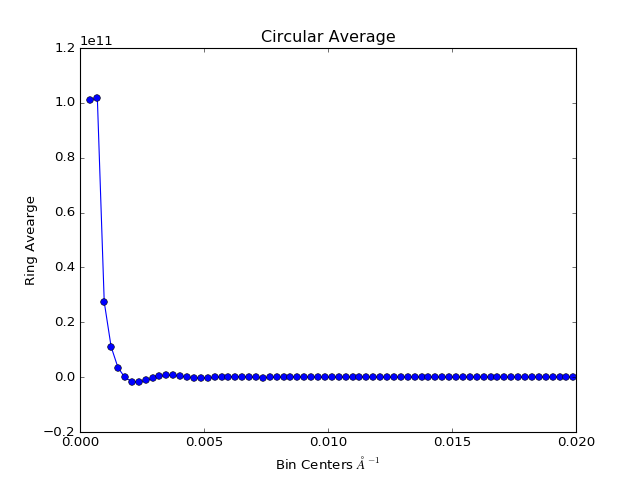

In [250]:

fig,axes = plt.subplots(figsize=(8, 6))
#axes.semilogy(bin_centers, ring_averages, '-o')
axes.plot(bin_centers/71*0.02, ring_averages, '-o')
axes.set_title('Circular Average')
axes.set_ylabel('Ring Avearge')
axes.set_xlabel('Bin Centers 'r'$\AA^{-1}$')
#axes.set_xlim(0.00,40)
#axes.set_ylim(-4E10,.4E12)
#axes.set_yscale('log')

plt.show()

In [251]:
#YG's code

In [252]:
import sys, shutil
EssCod_PATH='/home/yuzhang/XPCS_Anlysis/notebook_XPCS/EssCode/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)

from XPCS_Functions import azimuthal_integration

In [253]:
ceny,cenx = center

q,iq=azimuthal_integration( pq2d, qstart=1, qend=80, qwidth=1., cenx=cenx,ceny=ceny, qmask= None,)

<IPython.core.display.Javascript object>


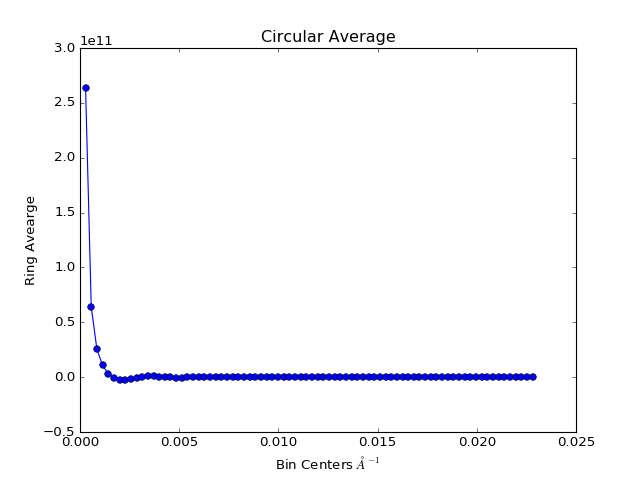

In [254]:
fig,axes = plt.subplots(figsize=(8, 6))
#axes.semilogy(bin_centers, ring_averages, '-o')
axes.plot(q/71*0.02,iq, '-o')
axes.set_title('Circular Average')
axes.set_ylabel('Ring Avearge')
axes.set_xlabel('Bin Centers 'r'$\AA^{-1}$')
#axes.set_xlim(0.00,40)
#axes.set_ylim(-4E10,.4E10)
plt.show()

<IPython.core.display.Javascript object>


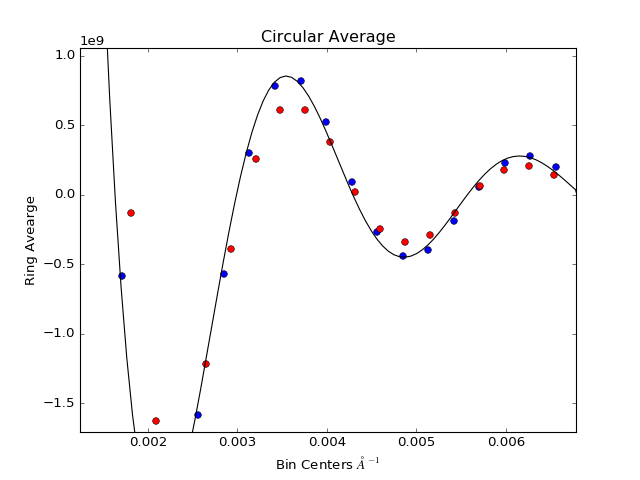

In [255]:
fig,axes = plt.subplots(figsize=(8, 6))
#axes.semilogy(bin_centers, ring_averages, '-o')
axes.plot(q/71*0.02,iq, 'bo')
axes.plot(bin_centers/71*0.02, ring_averages, 'ro')
axes.plot( qt, pqt, 'k',ls='-')


axes.set_title('Circular Average')
axes.set_ylabel('Ring Avearge')
axes.set_xlabel('Bin Centers 'r'$\AA^{-1}$')
#axes.set_xlim(0.00,40)
axes.set_ylim(-3E9,.15E10)
plt.show()